## TP 2 : k-plus proches voisins, analyse discriminante linéaire et régression logistique

### GENERATION ARTIFICIELLE DE DONNEES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, model_selection
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
run tpknnsource.py

### Q1
Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers. 
Que renvoient ces fonctions ? À quoi correspond la dernière colonne ? 

Générez les données en utilisant chaque
de ces 4 fonctions avec les paramètres du corrigé du TP1 (pour rand_checkers prenez 150 pour
les deux premiers arguments ; pour rand_tri_gauss générez 50 observations dans chaque classe,
centrées en $(1, 1)^T$ , $(−1, −1)^T$ et $(1, −1)^T$ , tous les écart-types égaux à 0.9). On va nommer ces
jeux de données #1, #2, #3 et #4, respectivement.

In [3]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X_1,y_1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

In [4]:
n1 = 50
n2 = 50
n3= 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
sigmas3 = [0.9, 0.9]
X_2,y_2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigmas1, sigmas2, sigmas3)

In [5]:
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X_3,y_3 = rand_clown(n1, n2, sigmas1, sigmas2)

In [6]:
n1 = 150
n2 = 150
sigma = 0.1
X_4,y_4 = rand_checkers(n1, n2, sigma)

**Commentaire**: 
- rand_bi_gauss: renvoie deux gaussiennes
- rand_tri_gauss: renvoie trois gaussiennes
- rand_clown: renvoie une distribution qui forme un sourire ainsi qu'une gaussienne
- rand_checkers : renvoie une distribution qui prend la forme d'un damier ainsi qu'une distribution uniforme


- La dernière colonne correspond au label à prédire

### Q2
Utilisez la fonction plot_2d afin d’afficher les jeux de données générés avec chacune des fonctions.

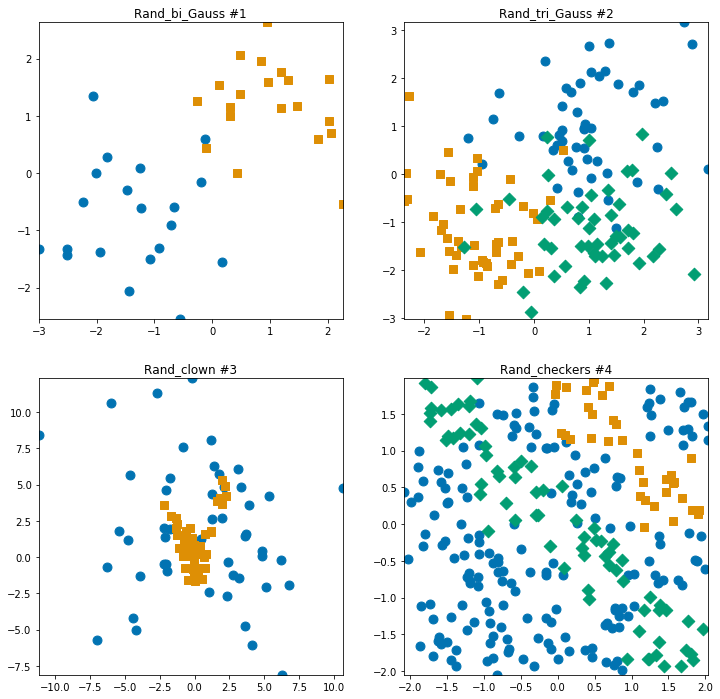

In [7]:
plt.figure(1, figsize=(12, 12))
#plot rand_bi_gauss
plt.subplot(2,2,1)
plt.title('Rand_bi_Gauss #1')
plot_2d(X_1,y_1)
#plot rand_tri_gauss
plt.subplot(2,2,2)
plt.title('Rand_tri_Gauss #2')
plot_2d(X_2,y_2)
#plot rand_clown
plt.subplot(2,2,3)
plt.title('Rand_clown #3')
plot_2d(X_3,y_3)
#plot rand_checkers
plt.subplot(2,2,4)
plt.title('Rand_checkers #4')
plot_2d(X_4,y_4)

### Q3 
Proposez une version adaptée de cette méthode pour la régression, i.e., quand les observations y
sont à valeurs réelles : $Y = \mathbb{R}$.

**Commentaire** : Une version adaptée de cette méthode pour la régression serait d'attribuer la moyenne des k plus proches voisins à x

### Q4
Écrivez votre propre classe KNNClassifier avec les méthodes d’apprentissage fit et de classification
predict. Choisissez une stratégie de traitement des ex aequo, c’est-à-dire des points avec la même
distance ou le même nombre de points de chaque classe dans V k (x). Vérifier la validité des résultats
en les comparant à ceux de la classe KNeighborsClassifier de scikit-learn en utilisant le jeu de
données #2. Vous proposerez votre propre méthode de comparaison (par exemple, en utilisant les
observations d’indice pair pour le set d’apprentissage et celles d’indice impair pour le set de test).

In [8]:
class KNNClassifier(BaseEstimator,ClassifierMixin):
    """Home made kNN classifier class"""
    def __init__(self,n_neighbors=1):
        self.n_neighbors = n_neighbors
        
    def fit(self,X,y):
        self.X = X
        self.y = y
    
    def get_knn(self, x):
        #a function to get the K-neighbors for the datapoint x
        distances = [np.linalg.norm(x-Xi) for Xi in self.X]
        all_neighbors = np.argsort(distances)
        knn = all_neighbors[:self.n_neighbors]
        return knn
    
    def predict(self,X):
        #list the knn for each point of X
        knns = list(map(self.get_knn, X))
        
        #get the label of each neighbor within the K-neighbors, for each point of X
        labels =[]
        for knn_one_point in knns:
            #get the label of each neighbor within the K-neighbors for one point
            labels_one_point=[]
            for indice in knn_one_point:
                labels_one_point.append(self.y[indice]) 
            labels.append(labels_one_point)
                
        #get the most occuring label within the K-neighbors, for each point
        most_occuring_label=[]
        for label_set in labels:
            most_occuring_label.append(max(label_set,key=label_set.count))
        
        return most_occuring_label
        

In [9]:
#vérification de la validité des résultats en les comparant à ceux de la classe KNeighborsClassifier de scikit-learn sur le jeu de données #2
myKNN = KNNClassifier(n_neighbors = 5)
myKNN.fit(X_2[::2],y_2[::2])

knn_scikit = KNeighborsClassifier(n_neighbors=5)
knn_scikit.fit(X_2[::2],y_2[::2])

myKNN.predict(X_2[1::2]) == knn_scikit.predict(X_2[1::2])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Commentaire**: on obtient bien les mêmes résultats que la classe KNeighborsClassifier de scikit-learn. **Edit**: Selon les échantillons choisies aléatoirement, on peut avoir une ou deux prédictions qui diffèrent entre les deux classes KnnClassifiers et KNeighborsClassifier

### Q5
Faites tourner sur les quatre exemples de jeu de données cet algorithme de classification, en utilisant
la distance euclidienne classique $d(x, v) = ||x − v||_2$ et $k = 5$. Visualisez les règles de classification
obtenues en utilisant la fonction frontiere_new.

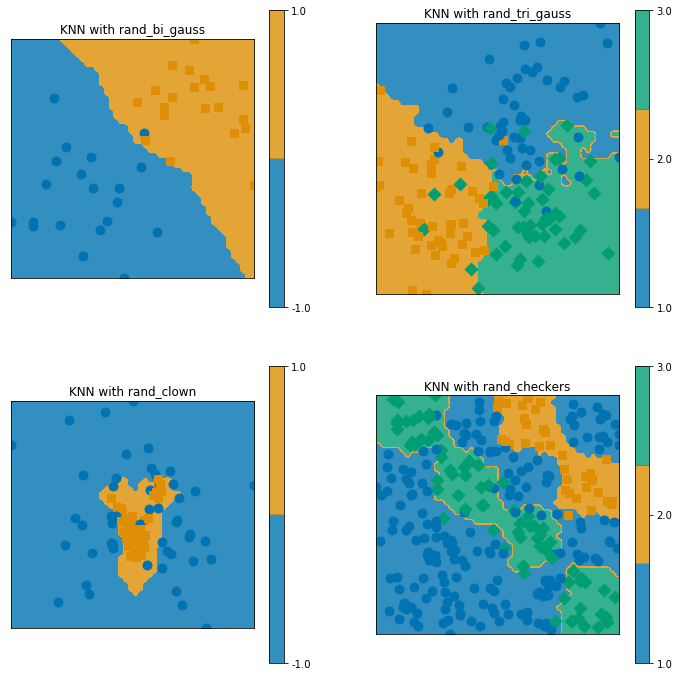

In [10]:
knn_sk_bi_gauss = KNeighborsClassifier(n_neighbors=5)
knn_sk_tri_gauss = KNeighborsClassifier(n_neighbors=5)
knn_sk_rand_clown = KNeighborsClassifier(n_neighbors=5)
knn_sk_rand_checkers = KNeighborsClassifier(n_neighbors=5)


plt.figure(1, figsize=(12,12))
plt.subplot(2,2,1)
plt.title('KNN with rand_bi_gauss')
knn_sk_bi_gauss.fit(X_1, y_1)
frontiere_new(lambda x: knn_sk_bi_gauss.predict(x.reshape(1,-1)), X_1, y_1)

plt.subplot(2,2,2)
plt.title('KNN with rand_tri_gauss')
knn_sk_tri_gauss = KNeighborsClassifier(n_neighbors =5)
knn_sk_tri_gauss.fit(X_2, y_2)
frontiere_new(lambda x: knn_sk_tri_gauss.predict(x.reshape(1,-1)), X_2, y_2)

plt.subplot(2,2,3)
plt.title('KNN with rand_clown')
knn_sk_rand_clown = KNeighborsClassifier(n_neighbors =5)
knn_sk_rand_clown.fit(X_3, y_3)
frontiere_new(lambda x: knn_sk_rand_clown.predict(x.reshape(1,-1)), X_3, y_3)

plt.subplot(2,2,4)
plt.title('KNN with rand_checkers')
knn_sk_rand_checkers = KNeighborsClassifier(n_neighbors =5)
knn_sk_rand_checkers.fit(X_4, y_4)
frontiere_new(lambda x: knn_sk_rand_checkers.predict(x.reshape(1,-1)), X_4, y_4)

### Q6.
Pour les observations d’indice pair du jeu de données #2, faites varier le nombre k de voisins pris
en compte : k = 1, 2, . . . , n. Que devient la méthode dans le cas extrême où k = 1 ? k = n ? Afficher
ces cas sur les données étudiées en utilisant la fonction frontiere_new et présentez les dans une
forme facilement lisible. Dans quels cas la frontière est-elle complexe ? simple ?

In [11]:
n = len(X_2[::2])
nber_of_neighbors = [1,2,3,5,10,15,30,50,n]

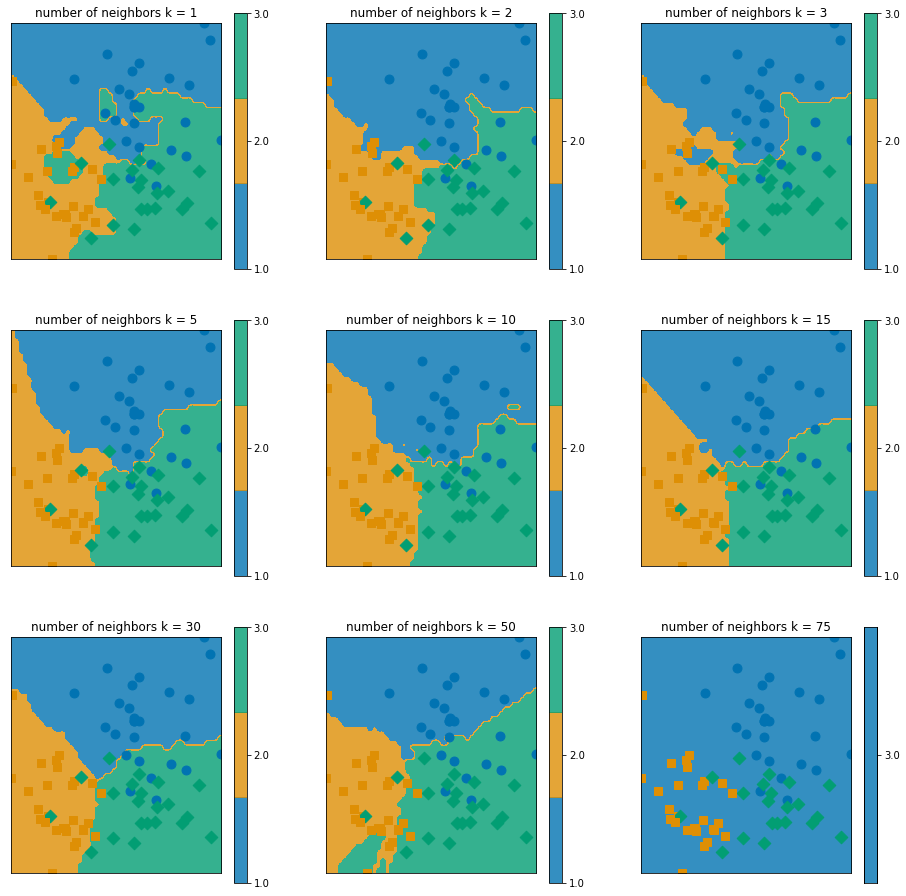

In [12]:
plt.figure(figsize=(16,16))
for i in nber_of_neighbors :
    plt.subplot(3,3, nber_of_neighbors.index(i) + 1)
    knn_sk_tri_gauss = KNeighborsClassifier(n_neighbors=i)
    knn_sk_tri_gauss.fit(X_2[::2], y_2[::2])
    plt.title("number of neighbors k = "+ str(i))
    frontiere_new(lambda x: knn_sk_tri_gauss.predict(x.reshape(1,-1)), X_2[1::2], y_2[1::2])

**Commentaire**: Pour k = 1, nous sommes dans un cas d'overfitting (la frontière est complexe), la frontière se simplifie quand n augmente (elle se lisse). Lorsque k=n la classification est uniforme, il n'y a plus de frontière.

### Q7
Une variante possible très utilisée consiste à pondérer les poids du jème voisin selon $e^{-\frac{d_{j}^{2}}{h}} $(h contrôlant le niveau de pondération)


Implémentez cette variante dans scikit-learn en passant le paramètre weights au constructeur
de KNeighborsClassifier. (Une autre possibilité consiste à pondérer les variable et non seulement les observations, on le regarde pas ici.) On pourra s’inspirer de _weight_func de la partie
test de scikit-learn : https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neighbors/tests/test_neighbors.py Pour tester l’impact du choix de h sur les frontières de classification, visualisez les règles de classification pour $k = 7$ et $h = 10^i$ avec $i = −2, −1, 0, 1, 2$ ; utilisez les observations d’indice pair du jeux de données #2 pour l’entrainement du classifieur (Vous pouvez
utiliser la fonction frontiere_new.)

In [13]:
def weights_(dist):
    return np.exp(-(dist**2)/h)

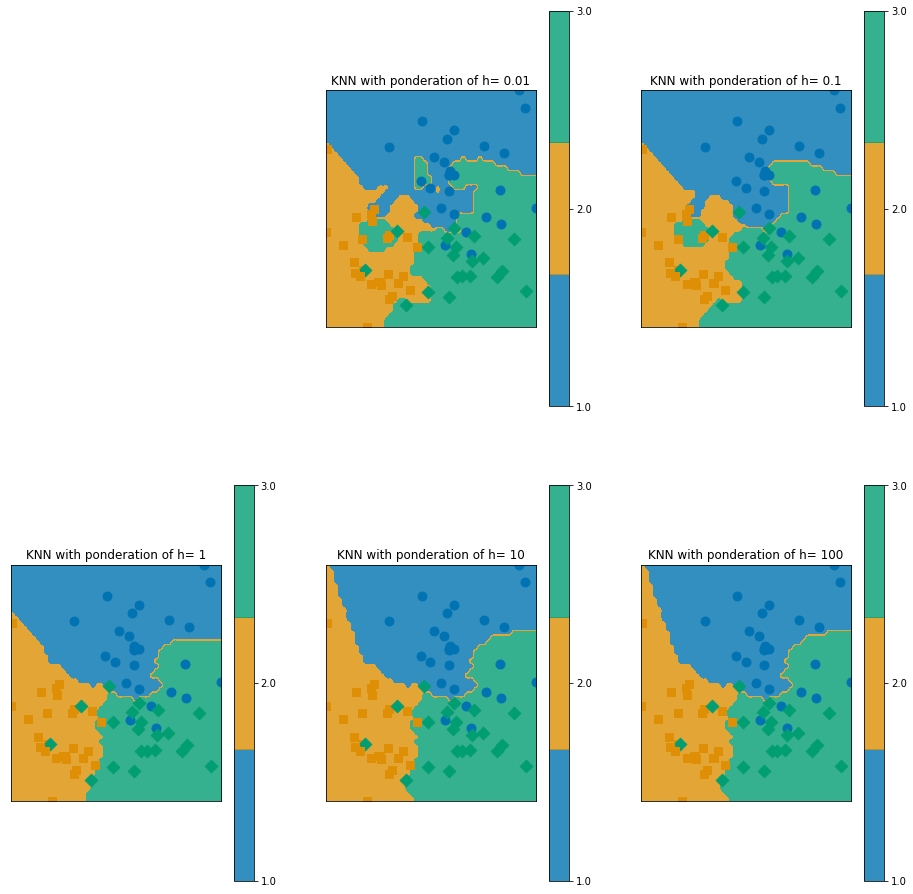

In [14]:
ponderation_level= [-2,-1,0,1,2]

plt.figure(figsize=(16,16))
for i in ponderation_level:
    plt.subplot(2,3,1+ ponderation_level.index(i)+1)
    h = 10**i
    knn_ponderation = KNeighborsClassifier(n_neighbors= 7 , weights = weights_)
    knn_ponderation.fit(X_2[::2], y_2[::2])
    plt.title("KNN with ponderation of h= "+ str(h))
    frontiere_new(lambda x: knn_ponderation.predict(x.reshape(1,-1)), X_2[1::2], y_2[1::2])

**Commentaire** : Lorsque la pondération est très faible (h=0.01 par exemple), on est dans un cas de surapprentissage. Plus la pondération est forte, plus la frontière se lisse

### Q8 
Quel est le taux d’erreur sur les mêmes données d’apprentissage (i.e., la proportion d’erreur faite
par le classifieur) lorsque k = 1 ? et sur des données de test (les observations d’indice impair) ?

In [15]:
knn_sk_tri_gauss = KNeighborsClassifier(n_neighbors= 1)
knn_sk_tri_gauss.fit(X_2[::2], y_2[::2])

#Taux d'erreur sur les données d'apprentissage
error_1= 1 - accuracy_score(knn_sk_tri_gauss.predict(X_2[::2]), y_2[::2])

#Taux d'erreur sur les données de test
error_2=1 - accuracy_score(knn_sk_tri_gauss.predict(X_2[1::2]), y_2[1::2])

print(f"Le taux d'erreur lorsque k=1 est égal à {error_1} sur les données d'apprentissage et {error_2} sur les données test.")

Le taux d'erreur lorsque k=1 est égal à 0.0 sur les données d'apprentissage et 0.30666666666666664 sur les données test.


**Commentaire**: le taux d'erreur faîte sur les mêmes données d'apprentissage est nulle lorsque k = 1: on est dans un cas d'overfitting et le voisin le plus proche est la donnée elle-même. 

### Q9
Pour le jeu de données #4, en utilisant les observations d’indice pair pour l’apprentissage et les observations d’indice impair pour le test, tracez le taux d’erreur en fonction de k pour k = 1, 2, . . . , 50.
Vous pourrez utiliser la classe fournie ErrorCurve.

In [16]:
Error_curve = ErrorCurve(k_range=range(1,51))
Error_curve.fit_curve(X_4[::2], y_4[::2], X_4[1::2], y_4[1::2])

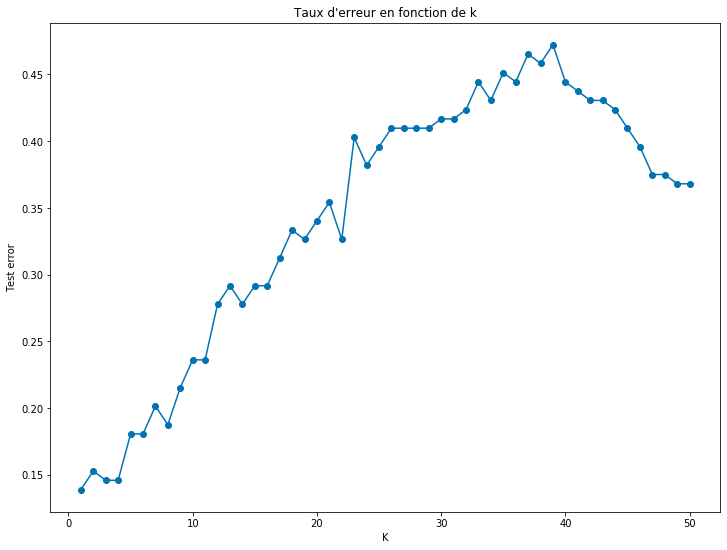

In [17]:
plt.figure(figsize=(12,9))
Error_curve.plot()
plt.title('Taux d\'erreur en fonction de k')
plt.show()

**Commentaire**: le taux d'erreur sur le jeu de données 4 est minimum pour k = 3

### Q10
Tracez les différentes courbes d’erreur en fonction du paramètre k = (1, 2, . . . , 50) sur le jeu de
données #4, pour des nombres d’échantillons d’entrainement n prenant les valeurs 100, 200, 500 à 1000. Cette fois, tirez l’ensemble d’apprentissage et l’ensemble de test indépendamment et de même
taille. Quelle est la meilleure valeur de k ? Est-ce la même pour les différents datasets ? Vous pourrez
utiliser la classe fournie ErrorCurve. Pour n = 1000 visualisez les données et la règle de décision
sur le même graphique. (Vous pouvez utiliser la fonction frontiere_new.)

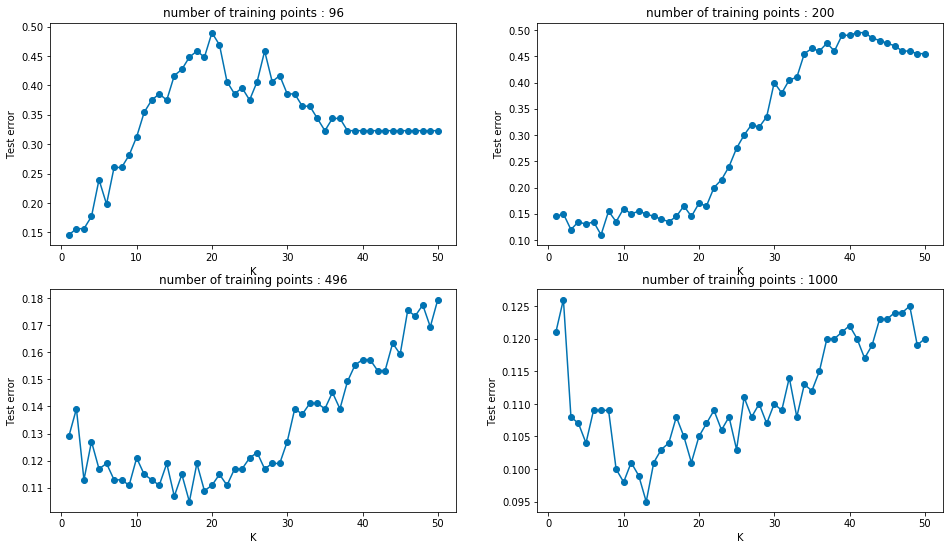

In [18]:
plt.figure(figsize=(16,9))
samples=[100,200,500,1000]
min_error=[]
for n in samples:
    errorCurve = ErrorCurve(k_range=range(1,51))
    sigma = 0.1
    X4, y4 = rand_checkers(n, n, sigma)
    X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.5, random_state=1)
    errorCurve.fit_curve(X_train, y_train, X_test, y_test)
    min_error.append(list(errorCurve.errors).index(min(errorCurve.errors)))
    plt.subplot(2,2,1+samples.index(n))
    errorCurve.plot()

In [19]:
min_error

[0, 6, 16, 12]

**Commentaire** : On observe que plus l'échantillon est grand et moins l'erreur est grande. La valeur du meilleurs K augmente avec la taille de l'échantillon, comme on peut le voir ci-dessous :

In [20]:
print(f"Meilleure k pour n = 100 : {min_error[0]}")
print(f"Meilleure k pour n = 200 : {min_error[1]}")
print(f"Meilleure k pour n = 500 : {min_error[2]}")
print(f"Meilleure k pour n = 1000 : {min_error[3]}")

Meilleure k pour n = 100 : 0
Meilleure k pour n = 200 : 6
Meilleure k pour n = 500 : 16
Meilleure k pour n = 1000 : 12


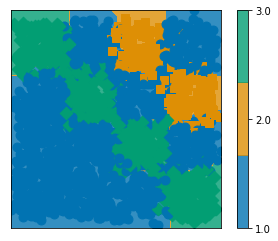

In [21]:
#Visualisation des données et la régle de décision pour échantillon = 1000
n1 = n2 = 1000
sigma = 0.1
X_train, y_train = rand_checkers(n1, n2, sigma)
X_test, y_test = rand_checkers(n1, n2, sigma)
knn_sk_rand_checkers = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn_sk_rand_checkers.fit(X_train, y_train)

frontiere_new(lambda x: knn_sk_rand_checkers.predict(x.reshape(1,-1)),X_test,y_test)

**Commentaires**: à k fixé, plus la taille de l'échantillon augmente et plus les plus proches voisins de chaque point sont près: comme on l'observe ci-dessus, les frontières sont alors plus complexes.

### Q11
A votre avis, quels sont les avantages et les inconvénients de la méthode des plus proches voisins : temps de calcul ? passage à l’échelle ? interprétabilité ?

**Avantage**: 
La méthode des plus proches voisins a l'avantage d'être plus facilement interprétable car le concept est simple. 

**Inconvénients**:
Cependant, pour chaque donnée à prédire, il faut mesurer la distance entre ce point et tous les autre points. Le temps de calcul augmente rapidement avec la taille de l'échantillon et il est donc très coûteux de l'utiliser pour des problèmes à grande dimension. On peut donc avoir des problèmes importants de passage à l'échelle.

### Q12
### ~Base digits de scikit-learn

Décrivez la nature et le format des données
(précisément), affichez un exemple. Tracez l’histogramme pour des classes. Coupez l’échantillon
en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième
pour le test. Appliquez la méthode aux données issues de la base digits pour un choix de k ≥ 1
(e.g., k = 30) et indiquez le taux d’erreur

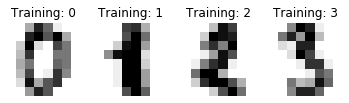

In [22]:
from sklearn import datasets
digits = datasets.load_digits()

#Sous forme d'images :
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

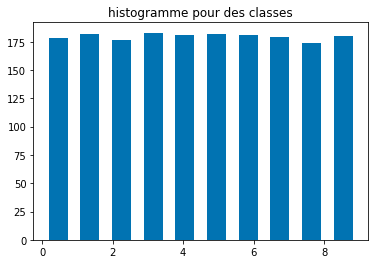

In [23]:
plt.hist(digits['target'], rwidth= 0.6);
plt.title('histogramme pour des classes')
plt.show()

**Commentaire** : les données sont réparties de façon presque égale entre les différentes classes  

In [24]:
from sklearn import metrics

#Comme décrit plus haut, on modifie le format des données pour pouvoir les utiliser :
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Coupez l’échantillon en deux parties de même taille et utilisez la première partie pour l’apprentissage et la deuxième pour le test
X_train, X_test, y_train, y_test = train_test_split(data, digits['target'], test_size=0.5, random_state=1)


KNN_digits = KNeighborsClassifier(n_neighbors=30)

KNN_digits.fit(X_train, y_train)

accuracy_ = accuracy_score(y_test, KNN_digits.predict(X_test))
error_3= 1 - accuracy_


In [44]:
print(f"On obtient une précision de {accuracy_} ce qui n'est pas mauvais")

On obtient une précision de 0.9388209121245829 ce qui n'est pas mauvais


### Q13
Estimez la matrice de confusion $(P \{Y = i, C_k(X) = j\} )_i,_j$ associée au classifieur $C_k$ ainsi
obtenu et visualisez celle-ci.

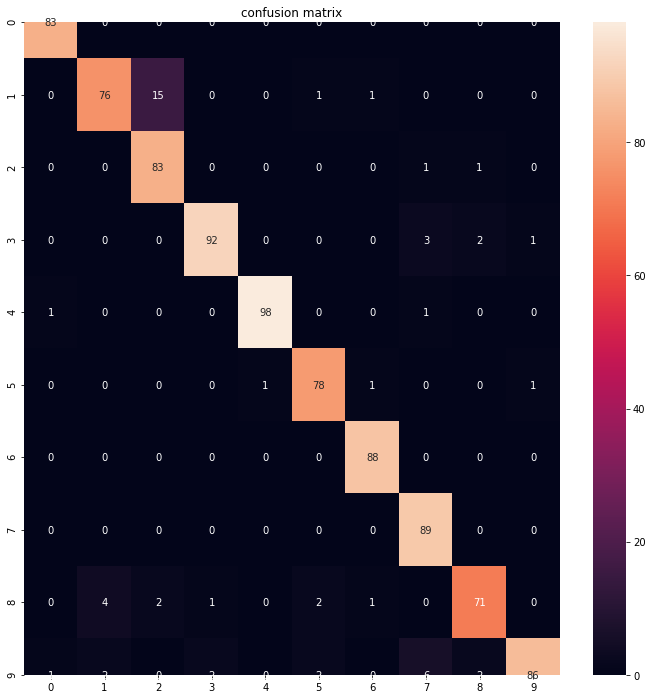

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, KNN_digits.predict(X_test))

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix, annot=True)
plt.title('confusion matrix')
plt.show()

**Commentaire** :

### Q14 
Proposez une méthode pour choisir k et mettez-la en œuvre. Vous pourrez utiliser la classe fournie
LOOCurve. En utilisant toutes les données, tracez la courbe du taux d’erreur leave-one-out pour
k = 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200.

In [27]:
Loo_Curve = LOOCurve(k_range=[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200])
#Loo_Curve.fit_curve(X = data, y = digits['target'])
Loo_Curve.fit_curve(X_train, y_train)

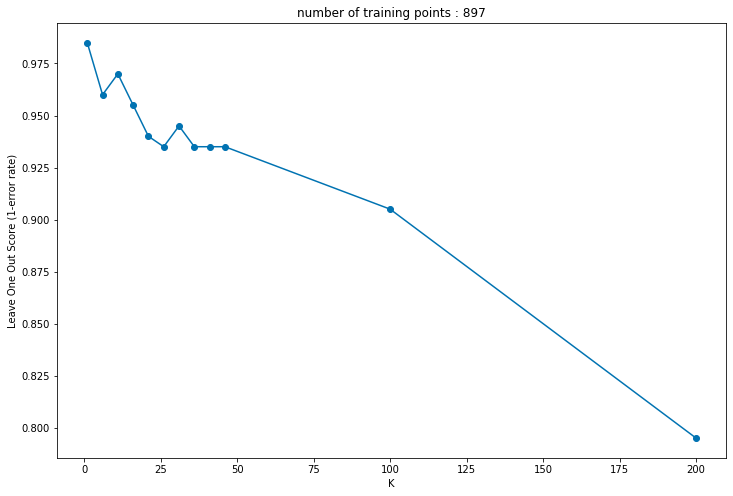

In [28]:
plt.figure(figsize=(12,8))
Loo_Curve.plot()
plt.show()

# <center>ANALYSE DISCRIMINANTE LINEAIRE

### Q15 

En utilisant la formule de Bayes donner la formule des probabilités a posteriori:
${ P\{Y = +1| X = x \} }$, ${ P\{Y =-1| X=x \}}$ comme fonctions $ f_{+} $, $ f_{-} $ et $ \pi_{+}$

On a
$$ P\{X=x\} = (P\{X=x|Y=+1\}P\{Y= +1\} + P\{X=x|Y=-1\}P\{Y= -1\}) = {f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})}$$

D'après la formule de Bayes

$$ P \{ Y = +1 | X = x \} = \frac {P\{X = x| Y = +1\}.P\{Y=+1\}}{P\{X = x\}} $$

$$ P \{ Y = -1 | X = x \} = \frac {P\{X = x| Y = -1\}.P\{Y=1\}}{P\{X = x\}} $$

donc

$$ P \{ Y = +1 | X = x \} = \frac {f_{+}.\pi_{+}}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$

$$ P \{ Y = -1 | X = x \} = \frac {f_{-}.(1-\pi_{+})}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$

### Q16
Exprimer le log-ratio des deux classes :
$log\left(\frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}}\right)$
en fonction $ \pi_{+}$,  $ \mu_{+}$,  $ \mu_{-}$,  Σ 

$$\begin{align}log\left(\frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}}\right)= 
log(\frac{f_{+}.\pi_{+}}{f_{-}.(1-\pi_{+})})= log(\frac{f_{+}}{f_{-}})+ log(\frac{\pi_{+}}{(1-\pi_{+})})\end{align}$$

or 

$$ \frac{f_+}{f_-} =  exp\left\{\frac{1}{2}\left[-(x-\mu_+)^T \Sigma^{-1} (x-\mu_+) + (x-\mu_-)^T \Sigma^{-1} (x-\mu_-) \right]\right\}$$

donc

\begin{align} 
log \left( \frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}} \right) &=
\left(-\frac{1}{2}.(x − μ_{+})^T Σ^{-1}  (x − μ_{+})+\frac{1}{2}(x − μ_{-})^T Σ^{-1} (x − μ_{-})\right) + log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\cdot\\
&=
\left(x^T.Σ^{-1}(μ_{+}-μ_{-})-\frac{1}{2}μ_{+}^T Σ^{-1}μ_{+}+\frac{1}{2}μ_{-}^T Σ^{-1}μ_{-}\right) + log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\\
\end{align}


### Q17
Justifier le choix du classifieur suivant :

$ \begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & 
x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})>
\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}-\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}
 + log \left({1-\frac{m}{n}}\right) - log\left(\frac{m}{n}\right)\\
-1 & sinon
\end{array}\right.
\end{equation} $

On classifie les nouvelles données avec le classifieurs de Bayes c'est à dire:



On choisit le classifieur:
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & {P \{ Y = +1 | X = x \}}>{ P \{ Y = -1 | X = x \}}\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
Par conséquent  :

\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & log\left(\frac{P\{Y=+1|X=x\}}{P\{Y=-1|X=x\}}\right) > 0 \\
-1 & sinon
\end{array}\right.
\end{equation}

\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & \left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)+ log\left(\frac{\hat{\pi}_{+}}{1-\hat{\pi}_{+}}\right)>0\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & \left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)> - log\left(\frac{\frac{m}{n}}{1-\frac{m}{n}}\right)\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$

\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & \left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)> - log\left(\frac{m}{n}\right) + log \left({1-\frac{m}{n}}\right)\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$

\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & 
x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})>
\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}-\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}
- log\left(\frac{m}{n}\right) + log \left({1-\frac{m}{n}}\right)\\
-1 & sinon
\end{array}\right.
\end{equation}

### Q18
Écrivez votre propre classe LDAClassifier avec les méthodes d’apprentissage fit et de classification
predict.

In [29]:
class LDAClassifier():

    def fit(self, X, y):
        m = list(y).count(1)
        n = len(y)
    
        Xpos = X[y == 1]
        Xneg = X[y == -1]
        
        self.mu_pos = 1/m * np.sum(Xpos, axis = 0)
        self.mu_neg = 1/(n-m)* np.sum(Xneg, axis = 0)
        
        sigma_pos = 1/(m-1)* np.dot((Xpos-self.mu_pos).T,(Xpos-self.mu_pos))
        sigma_neg = 1/(n-m-1)*np.dot((Xneg-self.mu_neg).T,(Xneg-self.mu_neg))
       
        self.sigma_total = 1/(n-2)*((m-1)*sigma_pos+(n-m-1)*sigma_neg)

        self.threshold = 1/2*(np.dot(self.mu_pos.T,np.linalg.inv(self.sigma_total))).dot(self.mu_pos) \
                        -1/2*(np.dot(self.mu_neg.T,np.linalg.inv(self.sigma_total))).dot(self.mu_neg) \
                        +math.log(1-m/n)-math.log(m/n)

    
    def predict_(self, x):
        if np.dot(x.T,np.linalg.inv(self.sigma_total)).dot((self.mu_pos - self.mu_neg)) > self.threshold:
            return 1
        else:
            return -1
    
    def predict(self, X):
        return list(map(lambda x : self.predict_(x), X))
    
    def score(self, X,y):
        return np.mean(self.predict(X)==y)

### Q19
Importez le module sklearn.discriminant_analysis qui contient en particulier la classe
LinearDiscriminantAnalysis qui nous servira dans la suite.

Vérifiez la validité des résultats obtenus avec votre méthode en les comparant à ceux de la classe
LinearDiscriminantAnalysis de scikit-learn en utilisant un jeu de données simulé. Vous proposerez votre propre méthode de comparaison (l’échantillon d’apprentissage doit être petit et l’échantillon de validation doit être assez grand ; on considère par ailleurs que m est différent de n − m,
i.e., les deux classes ne sont pas représentées par le même nombre d’échantillons observés). Indiquez
les taux d’erreur de LDAClassifier et de LinearDiscriminantAnalysis et le nombre de cas où les
prédictions coïncident. En utilisant votre classe LDAClassifier, visualisez la règle de classification.
(Vous pouvez utiliser la fonction frontiere_new.)

In [30]:
# création d'un jeu de données #1 avec classes déséquilibrées
n1 = 50
n2 = 1000
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
unbalanced_X_1, unbalanced_y_1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

# création d'un jeu de données #3 avec classes déséquilibrées
n1 = 100
n2 = 1000
sigmas1 = 1.
sigmas2 = 5.
unbalanced_X_3, unbalanced_y_3 = rand_clown(n1, n2, sigmas1, sigmas2)

#création de jeu de train et test pour des jeux de données déséquilibrés
X1u_train, X1u_test, y1u_train, y1u_test = train_test_split(unbalanced_X_1, unbalanced_y_1, test_size=0.8, random_state=1)
X3u_train, X3u_test, y3u_train, y3u_test = train_test_split(unbalanced_X_3, unbalanced_y_3, test_size=0.8, random_state=1)

In [31]:
#vérification sur jeu de données #1
myLDAClassifier_1 = LDAClassifier()
myLDAClassifier_1.fit(X1u_train, y1u_train)

LDAClassifier_sk_1 = LinearDiscriminantAnalysis()
LDAClassifier_sk_1.fit(X1u_train, y1u_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
all(myLDAClassifier_1.predict(X1u_test) == LDAClassifier_sk_1.predict(X1u_test))

True

In [33]:
error_lda_1=1 - myLDAClassifier_1.score(X1u_test, y1u_test)
error_lda_sk_1= 1 - LDAClassifier_sk_1.score(X1u_test, y1u_test)

print("sur le jeu de donnée bi_gauss :")
print(f"Le taux d'erreur de LDACLassifier() est de {error_lda_1} ")
print(f"Le taux d'erreur de LinearDiscriminantAnalysis() est de {error_lda_sk_1} ")

sur le jeu de donnée bi_gauss :
Le taux d'erreur de LDACLassifier() est de 0.020238095238095277 
Le taux d'erreur de LinearDiscriminantAnalysis() est de 0.020238095238095277 


In [34]:
#vérification sur jeu de données #3
myLDAClassifier_3 = LDAClassifier()
myLDAClassifier_3.fit(X3u_train, y3u_train)

LDAClassifier_sk_3 = LinearDiscriminantAnalysis()
LDAClassifier_sk_3.fit(X3u_train, y3u_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [35]:
all(myLDAClassifier_3.predict(X3u_test) == LDAClassifier_sk_3.predict(X3u_test))

True

**Commentaire** = On retrouve bien les mêmes résultats que le classifier de  scikit-learn.

In [36]:
error_lda_3=1 - myLDAClassifier_3.score(X3u_test, y3u_test)
error_lda_sk_3= 1 - LDAClassifier_sk_3.score(X3u_test, y3u_test)

print("sur le jeu de donnée rand_clown :")
print(f"Le taux d'erreur de LDACLassifier() est de {error_lda_3} ")
print(f"Le taux d'erreur de LinearDiscriminantAnalysis() est de {error_lda_sk_3} ")

sur le jeu de donnée rand_clown :
Le taux d'erreur de LDACLassifier() est de 0.09431818181818186 
Le taux d'erreur de LinearDiscriminantAnalysis() est de 0.09431818181818186 


**Commentaire** = les résultats sont moins bons sur le jeu de données rand_clown par rapport au jeu de données bi_gauss

### Q20
En utilisant votre classe LDAClassifier, visualisez la règle de classification pour les jeux de données #1 et #3. (Vous pouvez utiliser la fonction frontiere_new.) Discutez l’efficacité de la méthode
dans ces deux cas

<function matplotlib.pyplot.show(*args, **kw)>

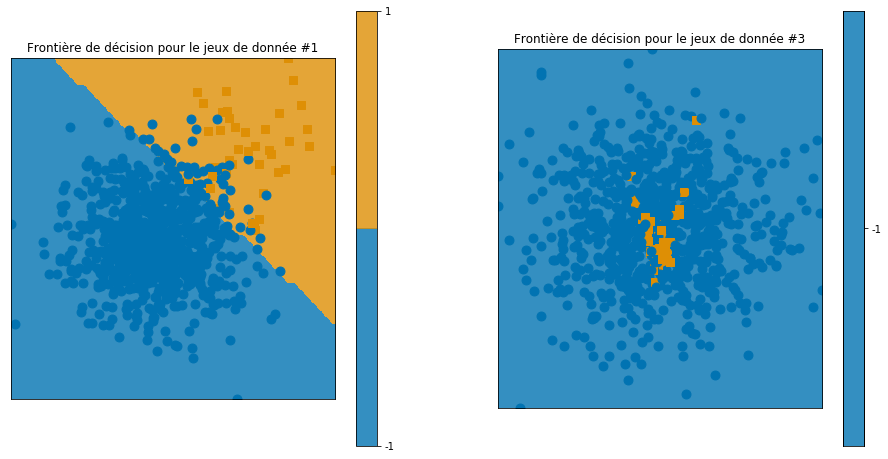

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.8, random_state=1)

myLDAClassifier_1 = LDAClassifier()
myLDAClassifier_1.fit(X1_train,y1_train)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.title("Frontière de décision pour le jeux de donnée #1")
frontiere_new(lambda x: myLDAClassifier_1.predict(x.reshape(1,-1)),X1u_test,y1u_test)

plt.subplot(1,2,2)
plt.title("Frontière de décision pour le jeux de donnée #3")
frontiere_new(lambda x: myLDAClassifier_3.predict(x.reshape(1,-1)), X3u_test, y3u_test)
          
plt.show

**Commentaire** : L'analyse discrimante linéaire est efficace si les données sont linéairement séparables, ce qui n'est pas le cas du jeu de données #3

### <center> Méthode discriminative avec régression logistique

### Q21
Appliquez la classification par régression logistique sur les données rand_bi_gauss. Comparer les
résultats avec la LDA, notamment lorsque une classe est beaucoup plus petite que l’autre ( i.e. a beaucoup moins d’observations). On parle alors de classes déséquilibrées.

In [38]:
from sklearn import linear_model

In [39]:
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg.fit(X1_train, y1_train)
log_reg_score_=log_reg.score(X1_test, y1_test)

LDAClassifier_sk_1 = LinearDiscriminantAnalysis()
LDAClassifier_sk_1.fit(X1_train, y1_train)
lda_score_=LDAClassifier_sk_1.score(X1_test, y1_test)
#résultat pour classes équilibrées


print("sur le jeu de donnée rand_bi_gauss avec classes équilibrées: ")
print(f" - Le score d'une analyse discriminante linéaire est de {lda_score_} ")
print(f" - Le score d'une régression linéaire est de {log_reg_score_} ")


sur le jeu de donnée rand_bi_gauss avec classes équilibrées: 
 - Le score d'une analyse discriminante linéaire est de 0.96875 
 - Le score d'une régression linéaire est de 0.96875 


In [40]:
log_reg_unblcd = linear_model.LogisticRegression(solver='liblinear')
log_reg_unblcd.fit(X1u_train, y1u_train)
log_reg_unblcd_score_=log_reg_unblcd.score(X1u_test, y1u_test)

LDAClassifier_sk_1_unblcd = LinearDiscriminantAnalysis()
LDAClassifier_sk_1_unblcd.fit(X1u_train, y1u_train)
lda_score_=LDAClassifier_sk_1_unblcd.score(X1u_test, y1u_test)
#résultat pour classes déséquilibrées

print("sur le jeu de donnée rand_bi_gauss avec classes déséquilibrées: ")
print(f" - Le score d'une analyse discriminante linéaire est de {lda_score_}" )
print(f" - Le score d'une régression logistique est de {log_reg_unblcd_score_} ")


sur le jeu de donnée rand_bi_gauss avec classes déséquilibrées: 
 - Le score d'une analyse discriminante linéaire est de 0.9797619047619047
 - Le score d'une régression logistique est de 0.9797619047619047 


**Commentaire**: les performances sont identiques lorsque le jeu de donnée a des classes équilibrés. la LDA s'en sort un tout petit peu mieux lorsque les classes sont déséquilibrées.

### Q22 
À quoi correspond la variable coef_ du modèle ? intercept_ ?

In [41]:
log_reg.coef_, log_reg.intercept_

print(f"vecteur normal : {log_reg.coef_}")
print(f"intercept : {log_reg.intercept_}")

vecteur normal : [[1.00250704 0.71997508]]
intercept : [0.14370359]



**Commentaire** La variable coef_ correspond au vecteur normal à la frontière de décision, l'intercept_ à l'ordonnée à l'origine de cette même frontière.

### Q23 
Utiliser la fonction frontiere_new pour visualiser la frontière de décision.


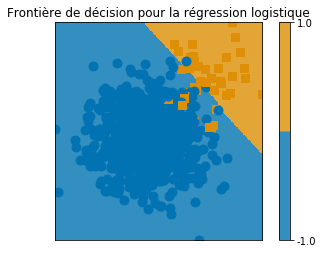

In [42]:
plt.title("Frontière de décision pour la régression logistique")
frontiere_new(lambda x: log_reg_unblcd.predict(x.reshape(1,-1)),X1u_test,y1u_test)

### Q24 
Appliquez la classification par régression logistique à des données issues de la base digits. Comme
précédemment, coupez l’échantillon en deux parties de même taille et utilisez la première partie
pour l’apprentissage et la deuxième pour tester. Indiquez le taux d’erreur.

In [43]:
log_reg_digits = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')
log_reg_digits.fit(data[::2], digits['target'][::2])

error_logreg_digits = 1-log_reg_digits.score(data[1::2], digits['target'][1::2])
print(f"Le taux d'erreur est de {error_logreg_digits}")

Le taux d'erreur est de 0.060133630289532336
